In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('../src')
from sk3d.data import io
from sk3d.data.dataset import ScenePaths

Setup paths to dataset files.

In [2]:
scene_paths = ScenePaths(
    scene_name='dragon',
    data_dir='.../sk3d/dataset',
    raw_dir='.../sk3d/raw',
)

Load RGB images.

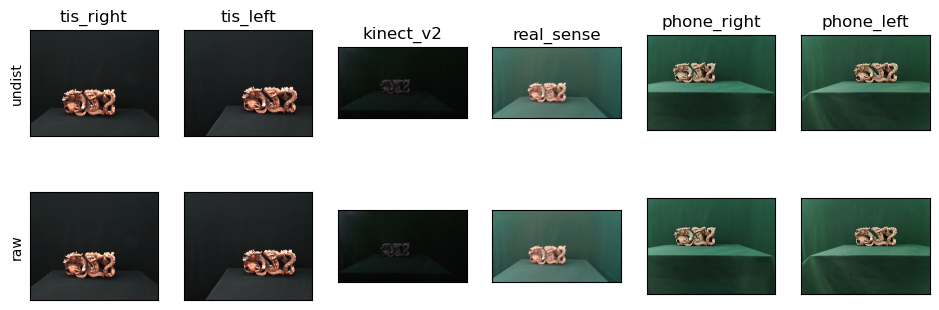

In [3]:
mode = 'rgb'

variants = ['undist', 'raw']
cams = ['tis_right', 'tis_left', 'kinect_v2', 'real_sense', 'phone_right', 'phone_left']

fig, axes = plt.subplots(len(variants), len(cams), figsize=(9, 3))
for i, var in enumerate(variants):
    for cam, ax in zip(cams, axes[i]):
        light = 'ambient@best' if (cam != 'kinect_v2') else 'ambient'
        img = scene_paths.img(cam, mode, 0, light, var)
        img = io.read(img, cam, mode, var)
        ax.imshow(img)
        
# Tune plots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
for i, var in enumerate(variants):
    axes[i, 0].set_ylabel(var)
for cam, ax in zip(cams, axes[0]):
    ax.set_title(cam)
plt.subplots_adjust(0, 0, 1, 1)

Load IR images.

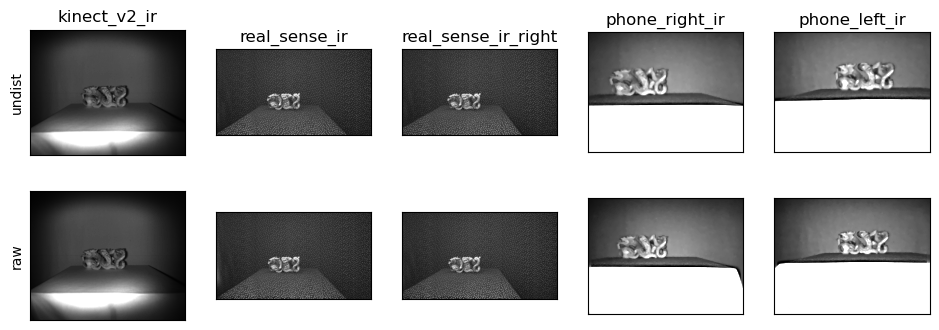

In [4]:
mode = 'ir'

cam_modes = [('kinect_v2', 'ir'), ('real_sense', 'ir'), ('real_sense', 'ir_right'), ('phone_right', 'ir'), ('phone_left', 'ir')]
fig, axes = plt.subplots(len(variants), len(cam_modes), figsize=(9, 3))

for i, var in enumerate(variants):
    for (cam, mode), ax in zip(cam_modes, axes[i]):
        light = None if (cam != 'real_sense') else 'ambient@best'
        if cam == 'kinect_v2':
            vmin, vmax = 0, 2**16
        elif cam == 'real_sense':
            vmin, vmax = 0, 255
        elif cam.startswith('phone'):
            vmin, vmax = 0, 255  # but could be anything up to 2**16
        
        img = scene_paths.img(cam, mode, 0, light, var)
        img = io.read(img, cam, mode, var)
        ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        
# Tune plots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
for i, var in enumerate(variants):
    axes[i, 0].set_ylabel(var)
for (cam, mode), ax in zip(cam_modes, axes[0]):
    ax.set_title(f'{cam}_{mode}')
plt.subplots_adjust(0, 0, 1, 1)

Load depth maps.

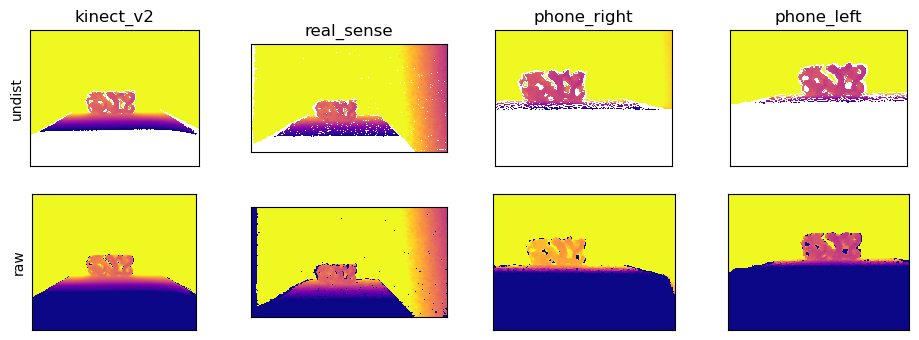

In [5]:
mode = 'depth'

cams = ['kinect_v2', 'real_sense', 'phone_right', 'phone_left']
fig, axes = plt.subplots(len(variants), len(cams), figsize=(9, 3))

for i, var in enumerate(variants):
    if var == 'undist':
        vmin, vmax = .5, .9  # meters
    elif var == 'raw':
        vmin, vmax = 500, 900  # mm
    for cam, ax in zip(cams, axes[i]):
        light = None if (cam != 'real_sense') else 'ambient@best'
        img = scene_paths.img(cam, mode, 0, light, var)
        img = io.read(img, cam, mode, var)
        ax.imshow(img, cmap='plasma', vmin=vmin, vmax=vmax, interpolation='none')
        
# Tune plots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
for i, var in enumerate(variants):
    axes[i, 0].set_ylabel(var)
for cam, ax in zip(cams, axes[0]):
    ax.set_title(cam)
plt.subplots_adjust(0, 0, 1, 1)